In [498]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [499]:
train_df = pd.read_csv('data/train.csv', header=0, index_col=0)
test_df = pd.read_csv('data/test.csv', header=0, index_col=0)
y = train_df['Survived']

full = pd.concat([train_df , test_df]) # concatenate two dataframesSURV = 891

SURV = 891
full.info()   # info about dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [500]:
# tratando as cabines 
# como as cabines tem uma letra inicial, pode pegar de acordo com a inicial
full['CabinType'] = full['Cabin'].astype(str).str[0]
full['_CabinType'] = pd.Categorical(full.CabinType).codes

# como as cabines tem uma letra inicial, pode pegar de acordo com a inicial e a primeira 
full['CabinType2'] = full['Cabin'].astype(str).str[0:2]
full['_CabinType2'] = pd.Categorical(full.CabinType2).codes

# categoria n = null 
full[:SURV].groupby(['Pclass','CabinType'])['Survived'].agg(['count','sum','mean'])

count    sum      mean
Pclass CabinType                        
1      A             15    7.0  0.466667
       B             47   35.0  0.744681
       C             59   35.0  0.593220
       D             29   22.0  0.758621
       E             25   18.0  0.720000
       T              1    0.0  0.000000
       n             40   19.0  0.475000
2      D              4    3.0  0.750000
       E              4    3.0  0.750000
       F              8    7.0  0.875000
       n            168   74.0  0.440476
3      E              3    3.0  1.000000
       F              5    1.0  0.200000
       G              4    2.0  0.500000
       n            479  113.0  0.235908

In [501]:
# transforma o sexo e o porto de embarque para códigos numericos
full['_Sex'] = pd.Categorical(full.Sex).codes
full['_Embarked'] = pd.Categorical(full.Embarked).codes

In [502]:
# correlaçao atual dos dados
cols = ['Age','_Embarked','Fare','Parch','Pclass','_Sex','SibSp','Survived','_CabinType']
full[cols].corr().abs()


,Age,_Embarked,Fare,Parch,Pclass,_Sex,SibSp,Survived,_CabinType
Age,1.000000,0.089292,0.178740,0.150917,0.408106,0.063645,0.243699,0.077221,0.312138
_Embarked,0.089292,1.000000,0.241442,0.046957,0.192867,0.104818,0.067802,0.176509,0.242810
Fare,0.178740,0.241442,1.000000,0.221539,0.558629,0.185523,0.160238,0.257307,0.547292
Parch,0.150917,0.046957,0.221539,1.000000,0.018322,0.213125,0.373587,0.081629,0.034438
Pclass,0.408106,0.192867,0.558629,0.018322,1.000000,0.124617,0.060832,0.338481,0.734749
_Sex,0.063645,0.104818,0.185523,0.213125,0.124617,1.000000,0.109609,0.543351,0.125487
SibSp,0.243699,0.067802,0.160238,0.373587,0.060832,0.109609,1.000000,0.035322,0.007952
Survived,0.077221,0.176509,0.257307,0.081629,0.338481,0.543351,0.035322,1.000000,0.301116
_CabinType,0.312138,0.242810,0.547292,0.034438,0.734749,0.125487,0.007952,0.301116,1.000000


In [503]:
# tratando os valores null de cabine 
print(full[full['Embarked'].isnull()])

# passageiro 62 e 830 Embarked são nulos

             Survived  Pclass                                       Name  \
PassengerId                                                                
62                1.0       1                        Icard, Miss. Amelie   
830               1.0       1  Stone, Mrs. George Nelson (Martha Evelyn)   

                Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  \
PassengerId                                                            
62           female  38.0      0      0  113572  80.0   B28      NaN   
830          female  62.0      0      0  113572  80.0   B28      NaN   

            CabinType  _CabinType CabinType2  _CabinType2  _Sex  _Embarked  
PassengerId                                                                 
62                  B           1         B2            8     0         -1  
830                 B           1         B2            8     0         -1  


Parch         0.046957
SibSp         0.067802
Age           0.089292
_Sex          0.104818
Survived      0.176509
Pclass        0.192867
Fare          0.241442
_CabinType    0.242810
_Embarked     1.000000
Name: _Embarked, dtype: float64
          count      min       max        mean   median
Embarked                                               
C            32  27.7208  512.3292  167.461069  91.0792
S            31   0.0000  211.3375   78.585352  82.2667
80.0


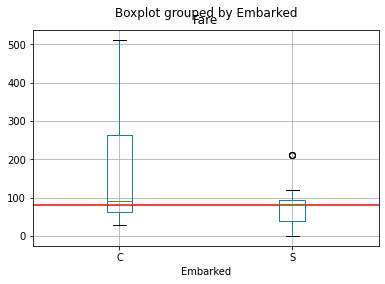

In [504]:
# as maiores correlação com Embarked são: Fare, Pclass, cabin.
print(full[cols].corr()['_Embarked'].abs().sort_values())

val = full[  (full['Pclass'] == 1) 
     & (full['CabinType'] == 'B') 
     ][['Fare','Embarked']]
print(val.groupby(['Embarked' ])['Fare'].agg(['count','min','max','mean','median']))
fareMedian = full[full['Embarked'].isnull()]['Fare'].agg(['median'])[0]
print(fareMedian)
ax = val.boxplot(column='Fare',by='Embarked')
ax.axhline(fareMedian,color='red')

# pelo gráfico os valores mais perto de Fare = 80 é o S
# atribuindo 's' para as duas que estavam nula
full.at[62,'Embarked'] = 'S'
full.at[830,'Embarked'] = 'S'

In [505]:
print(full[full['Fare'].isnull()])
print(full[cols].corr()['Fare'].abs().sort_values(ascending=False))
# considenrando as correlações Pclass Embarked Parch
val = full[  (full['Pclass'] == 3) 
     & (full['Embarked'] == 'S') 
     & (full['Parch'] == 0) 
      ][['Age','Fare']]

stats = val['Fare'].agg(['min','max','count','mean','median'])
full.at[1044,'Fare'] = stats['median']
print(full.loc[1044])

             Survived  Pclass                Name   Sex   Age  SibSp  Parch  \
PassengerId                                                                   
1044              NaN       3  Storey, Mr. Thomas  male  60.5      0      0   

            Ticket  Fare Cabin Embarked CabinType  _CabinType CabinType2  \
PassengerId                                                                
1044          3701   NaN   NaN        S         n           8         na   

             _CabinType2  _Sex  _Embarked  
PassengerId                                
1044                  49     1          2  
Fare          1.000000
Pclass        0.558629
_CabinType    0.547292
Survived      0.257307
_Embarked     0.241442
Parch         0.221539
_Sex          0.185523
Age           0.178740
SibSp         0.160238
Name: Fare, dtype: float64
Survived                      NaN
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60

Age           1.000000
Pclass        0.408106
_CabinType    0.312138
SibSp         0.243699
Fare          0.177281
Parch         0.150917
_Embarked     0.089292
Survived      0.077221
_Sex          0.063645
Name: Age, dtype: float64
             count    sum      mean
AgeCategory                        
9               62   38.0  0.612903
18              77   32.0  0.415584
30             447  148.0  0.331096
40             155   69.0  0.445161
50              86   33.0  0.383721
100             64   22.0  0.343750


<AxesSubplot:>

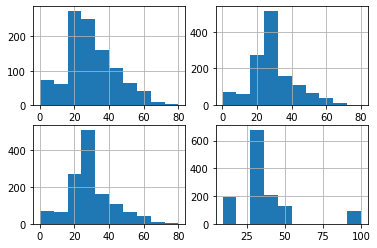

In [506]:
# tratando a idade
# começando pelas correlações
print(full[cols].corr()['Age'].abs().sort_values(ascending=False))

XAge = full[['Age']]

# Impute pela mediana
imp = SimpleImputer(strategy='median')
imp.fit(XAge)
XAgeImputer = np.array(imp.transform(XAge)).reshape(1, -1)[0]
full['_AgeMedian'] = XAgeImputer

# Impute pela media
imp = SimpleImputer(strategy='mean')
XAgeImputer = np.array(imp.fit_transform(XAge)).reshape(1, -1)
full['_AgeMean'] = XAgeImputer[0]

# colocando em grupos
full['_AgeMedianR'] = pd.cut(full['_AgeMedian'],[0,9,18,30,40,50,100]) # Add column with range of Age
full['_AgeMeanR'] = pd.cut(full['_AgeMean'],[0,9,18,30,40,50,100]) # Add column with range of Age

# criando faixa etária
full['AgeCategory'] = pd.cut(full['_AgeMedian'],[0,9,18,30,40,50,100], labels=[9,18,30,40,50,100]) # Add column with range of Age
full['_AgeCategory'] = full['AgeCategory'].cat.codes # Add column with range of Age

print(full[:SURV].groupby('AgeCategory')['Survived'].agg(['count','sum','mean']))

plt.subplot(221); full[full['Age'].notnull()]['Age'].hist()
plt.subplot(222); full['_AgeMean'].hist()
plt.subplot(223); full['_AgeMedian'].hist()
plt.subplot(224); full['AgeCategory'].hist()

In [507]:
# normalizar o Fare
from sklearn import preprocessing
full['_Fare'] = preprocessing.scale(full[['Fare']]) [:,0]

In [508]:
# obtendo formação
pat = r",\s([^ .]+)\.?\s+"
full['Title'] =  full['Name'].str.extract(pat,expand=True)[0]
full.loc[full['Title'].isin(['Mille','Ms','Lady']),'Title'] = 'Miss'
full.loc[full['Title'].isin(['Mme','Sir']),'Title'] = 'Mrs'
full.loc[~full['Title'].isin(['Miss','Master','Mr','Mrs']),'Title'] = 'Other'
full['_Title'] = pd.Categorical(full.Title).codes
full.groupby('Title')['Title'].count()



Title
Master     61
Miss      263
Mr        757
Mrs       199
Other      29
Name: Title, dtype: int64

In [509]:
full.head()
cols = ['_Sex','Pclass', '_CabinType', 'Fare', '_Embarked','Parch','_Title','SibSp', '_AgeMedian']

colsY = cols + ['Survived']
full[:SURV][colsY].corr()['Survived'].abs().sort_values(ascending=False)
full[full['_AgeMedian'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,_Embarked,_AgeMedian,_AgeMean,_AgeMedianR,_AgeMeanR,AgeCategory,_AgeCategory,_Fare,Title,_Title
PassengerId,,,,,,,,,,,,,,,,,,,,,


In [510]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from tree import Tree

Y = full[:SURV]['Survived']
X = full[:SURV][cols]



gridSearchLinearRegression = GridSearchCV(LinearRegression(), {'fit_intercept':[True, False]})
gridSearchLogisticRegression = GridSearchCV(LogisticRegression(),{'fit_intercept':[True, False], 'penalty':['l1', 'l2','elasticnet', 'none'], 'solver':['newton-cg', 'lfgs', 'lblinear', 'sg', 'sga'], 'multi_class':['auto', 'ovr', 'multinomial']})
gridSearchKNeighborsRegressor = GridSearchCV(KNeighborsRegressor(), {'n_neighbors': range(1, 21, 2)})
gridSearchDecisionTreeClassifier = GridSearchCV(DecisionTreeClassifier(), {'max_depth':range(1, len(cols),1), 'criterion':['gini', 'entropy'], 'splitter':['best', 'random']})
gridSearchTree = GridSearchCV(Tree(), {'method':['entropy', 'gini', 'misclassification']})

model_classifiers = {
  'linear':  gridSearchLinearRegression,
  'knn': gridSearchKNeighborsRegressor,
  'tree': gridSearchDecisionTreeClassifier,
  # 'tree': gridSearchTree,
  'logistic': gridSearchLogisticRegression
} 

Xp = full[SURV:][cols]
score = {}
out  = {}

result = pd.DataFrame({'PassengerID': full[SURV:].index })

best = 0
clas = ''

for c in model_classifiers:
    model = model_classifiers[c]
    model.fit(X,Y)
    model_score = model.score(X,Y)
    scores = cross_validate(model, X,Y)
    mean_score = np.mean(scores['test_score'])    
    score[c] = mean_score
    result[c]   = model.predict(Xp)

    print(f"model: {c}\t score: {mean_score}")
    if mean_score >=best:
        best = mean_score
        clas = c
        result['Survived'] = [int(x) for x in result[c]]

result[['PassengerID','Survived']].to_csv(f'submission_{clas}.csv',index=False)


model: linear	 score: 0.37549695947540146
model: knn	 score: 0.11958895231429767
model: tree	 score: 0.8170422446801833
model: logistic	 score: 0.786761659657272
